In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold  
from sklearn.feature_selection import SelectPercentile, f_regression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
import copy as cp
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator

In [25]:
train = pd.read_csv("../data/processed/train.csv")
test = pd.read_csv("../data/processed/test.csv")

In [26]:
train.pop("id")
test.pop("id")
target = train.pop("血糖")

In [27]:
train_x= train.as_matrix()
train_y = target.as_matrix()
test_x = test.as_matrix()

In [28]:
lgb_train = lgb.Dataset(train_x, train_y)

In [29]:
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    StackingEstimator(estimator=LinearSVR(C=0.01, dual=False, epsilon=1.0, loss="squared_epsilon_insensitive", tol=0.001)),
    StackingEstimator(estimator=RidgeCV()),
    lgb.LGBMRegressor(objective='regression',
                    boosting_type ="GBDT",
                    num_leaves=17,
                    learning_rate=0.01,
                    feature_fraction=0.5,
                    bagging_fraction=0.5,
                    bagging_freq=5,
                    reg_alpha=1,
                    reg_lambda=0.5,
                    n_estimators=500)
)
exported_pipeline.fit(train_x, train_y)
predict = exported_pipeline.predict(test_x)

C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


In [30]:
result = pd.DataFrame()

In [31]:
result[0] = predict

In [32]:
result.to_csv("../result/1.8-0.95963.csv", header=None, index=False,encoding="utf-8")

In [33]:
result.describe()

,0
count,1000.000000
mean,5.661539
std,0.743849
min,4.900321
25%,5.175076
50%,5.441421
75%,5.836757
max,11.090173


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

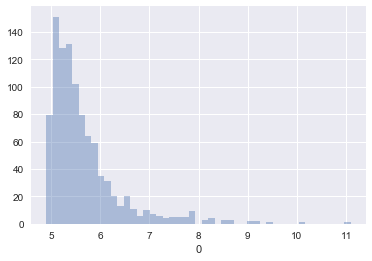

In [35]:
sns.distplot(result[0], kde=False)
plt.show()

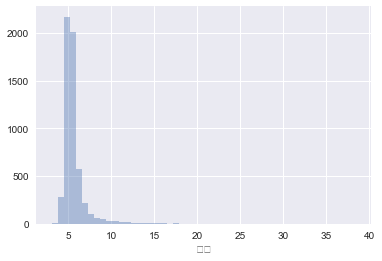

In [36]:
sns.distplot(target, kde=False)
plt.show()

In [37]:
comp = pd.DataFrame({"true":target,"predict":result[0]})

In [38]:
comp.describe()

,predict,true
count,1000.000000,5642.000000
mean,5.661539,5.631925
std,0.743849,1.544882
min,4.900321,3.070000
25%,5.175076,4.920000
50%,5.441421,5.290000
75%,5.836757,5.767500
max,11.090173,38.430000
